# **Week 0 Main Assignment**

In [1]:
!pip install numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 7.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 8.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 4.4 MB/s eta 0:00:00


### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [1]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [14]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
      data = np.loadtxt(data_path, delimiter=',')
      return data
      

In [11]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is not None:
        return init_centers
    else:
        return data[np.random.choice(data.shape[0], K, replace=False)]
    return None

In [13]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0], dtype=int)

In [18]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
   distances = np.linalg.norm(data[:, np.newaxis, :] - centers, axis=2)
   return distances

In [19]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
        return np.argmin(distances, axis=1)

In [21]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.array([data[labels == k].mean(axis=0) for k in range(K)])
    return centers

In [22]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
     return np.array_equal(labels1, labels2)

In [25]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [ ]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)
    plt.figure(figsize=(8, 6))
    colors = ['green', 'red']


    for k in range(centers.shape[0]):
        cluster_data = data[labels == k]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[k], label=f'Cluster {k}')
        
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='P', s=100, label='Centers')
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.savefig('kmeans.png')
    plt.show()

    # Scatter plot of the data points

    ### Set title as 'K-means clustering'

    ### Set xlabel as 'Longitude'

    ### Set ylabel as 'Latitude'

    ### Save the plot as 'kmeans.png'


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0002453327178955078


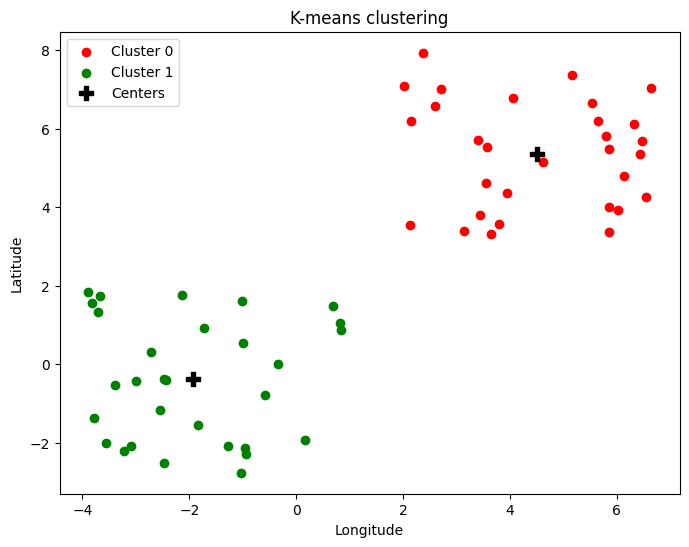

<module 'matplotlib.pyplot' from '/mnt/c/Users/D/Downloads/repo/git/Data-DaVinci/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [55]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)